# Funciones en R



Vamos a crear nuestra primera función para restar dos números.

In [1]:
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

In [7]:
restaDosNumeros <- function(x,y){
    z <- x-y
    return(z)
}
restaDosNumeros <- function(x,y){
    z <- x-y
    z
}
restaDosNumeros <- function(x,y){
    x-y
}

In [3]:
ls()

[1] "restaDosNumeros"

In [4]:
restaDosNumeros

function(x,y){
    z <- x-y
    return(z)
}

In [8]:
restaDosNumeros(10,7)

[1] 3

Podemos referenciar los parámetros por nombre:

In [9]:
restaDosNumeros(y=10,x=7)

[1] -3

Podemos definir parámetros opcionales con un valor por defecto.

In [10]:
restaDosNumerosConEscala <- function(x,y, scale=1){    
    (x-y)*scale
}

In [11]:
restaDosNumerosConEscala(10,7)

[1] 3

In [12]:
restaDosNumerosConEscala(10,7,5)

[1] 15

Las funciones en R son objetos como puede ser un número, un vector o un data frame.

In [13]:
ls()

[1] "restaDosNumeros"          "restaDosNumerosConEscala"

Podemos ver su contenido llamando al nombre del objeto, sin paréntesis.

In [14]:
restaDosNumeros

function(x,y){
    x-y
}
<bytecode: 0x559aebc69490>

## Estimador estadístico

Vamos a ver varios ejemplos de funciones en R utilizando estimadores estadísticos.

Un [estimador](https://es.wikipedia.org/wiki/Estimador) es un estadístico (esto es, una función de la muestra) usado para estimar un parámetro desconocido de la población.

Un estimador es una función que coje valores de una muestra de datos y hace un resumen, **estima un valor que define la muestra**.

Como ejemplo de población utilizaremos el siguiente vector de alturas:

In [1]:
alturas<-c(1.80,1.60,1.50,1.90,1.75,1.63,1.65)

### Media aritmética

En matemáticas y estadística, la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) (también llamada promedio o media) de un conjunto finito de números es el valor característico de una serie de datos cuantitativos, objeto de estudio que parte del principio de la esperanza matemática o valor esperado, se obtiene a partir de la suma de todos sus valores dividida entre el número de sumandos. 

\\[ \bar{x} =  \frac{1}{N} \sum _{i=1}^N x_i\\]

En R la función de la media se podría definir así:

In [16]:
myMean<-function(X){
    m <- 0
    for (xi in X){
        m <- m + xi
    }
    m/length(X)
}

In [17]:
myMean(alturas)

[1] 1.69

Evidentemente R tiene una función para la media cuya ejecución es mucho más rápida que nuestra función:

In [18]:
mean(alturas)

[1] 1.69

### Media truncada

La media truncada se utiliza cuando queremos quitar los $2p$ elementos más extremos ($p$ elementos por arriba y $p$ por abajo) del array del cómputo de la media. La media truncada es un estimador más robusto que la media.

\\[ \bar{x} =  \frac{1}{N-2p} \sum _{i=p+1}^{N-p} x_i\\]

En R se utiliza la función $mean$ con el parámetro $trim$ que indica que porcentaje de elementos del array eliminamos antes de hacer la media

In [19]:
alturas2 <- c(alturas,1000)
alturas2

[1]    1.80    1.60    1.50    1.90    1.75    1.63    1.65 1000.00

In [20]:
mean(alturas2)

[1] 126.4788

In [37]:
mean(alturas2,trim = 0.2)

[1] 1.721667

In [23]:
sort(alturas2)

[1]    1.50    1.60    1.63    1.65    1.75    1.80    1.90 1000.00

In [39]:
mean(sort(alturas2)[c(-1,-8)])

[1] 1.721667

In [32]:
?mean

### Media geométrica

La [media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica) de una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números.

\\[  \sqrt[N] {\prod _{i=1}^N x_i }\\]

Es equivalente a:
\\[
     e^{\frac{1}{N} \sum _{i=1}^N log(x_i)}
\\]

In [40]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm==T){
        X <- na.omit(X)
    }
    m <- 1
    for (xi in X){
        m <- m*xi
    }
    m^(1/length(X))
}

**¿Cual es el TAE medio en el cambio Bitcoins en doláres desde 2011?**

En la siguiente tabla podemos ver el precio en dólares a principios de cada año, junto con su revalorización porcentual durante ese año.

In [41]:
year<-c(2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022)
value<-c(0.3, 4.7,13.2,760,316,430,980,12000,13400,3200,6500,32000,47000)
ratio<-c(NA,value[2:length(value)]/value[1:length(value)-1])
rate<-(ratio-1)*100

In [42]:
bitcoinValue<-data.frame(año=year,valor=value,TAE=round(rate,2),ratio=round(ratio,4))
bitcoinValue

año,valor,TAE,ratio
<dbl>,<dbl>,<dbl>,<dbl>
2010,0.3,NA,NA
2011,4.7,1466.67,15.6667
2012,13.2,180.85,2.8085
2013,760.0,5657.58,57.5758
2014,316.0,-58.42,0.4158
2015,430.0,36.08,1.3608
2016,980.0,127.91,2.2791
2017,12000.0,1124.49,12.2449
2018,13400.0,11.67,1.1167


In [43]:
print(paste0("La media aritmética de todos los interes TAE es: ",
             round(mean(bitcoinValue$TAE,na.rm=T),2),"%"))

[1] "La media aritmética de todos los interes TAE es: 751.08%"


In [44]:
myGeometricMean(bitcoinValue$ratio,na.rm=T)

[1] 2.709679

In [45]:
realTAEmean<-(myGeometricMean(bitcoinValue$ratio,na.rm=T)-1)*100
print(paste0("La media real de todos los interes TAE es:",
             round(realTAEmean,2),"%"))

[1] "La media real de todos los interes TAE es:170.97%"


In [46]:
initialAmount<-10

print(paste0("Si hubieramos invertido $",initialAmount," a un interés del ",round(realTAEmean,2),
             "% TAE, 10 años después tendríamos $", round(initialAmount*(realTAEmean/100+1)^7)))

[1] "Si hubieramos invertido $10 a un interés del 170.97% TAE, 10 años después tendríamos $10726"


![Imagen no cargada. Edita y borra la @ ](https://akifrases.com/frases-imagenes/frase-el-interes-compuesto-es-la-fuerza-mas-poderosa-de-la-galaxia-albert-einstein-110175.jpg  )


![Imagen no cargada. Edita y borra la @ ]( https://i.pinimg.com/originals/f0/a7/28/f0a72881dabf1602f49665f714458c15.jpg  )


### Varianza / desviación típica

La [variancia](https://es.wikipedia.org/wiki/Varianza) (que suele representarse como $\sigma ^{2}$,$s^2$ o $Var(X)$) de una variable aleatoria es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media. O en pocas palabras, es la media de los residuos al cuadrado.

Es decir, define lo mucho que varía una variable aleatoria respecto a la media:
* Si todos los valores son iguales, no hay variación, la varianza es 0.
* Si los valores son muy diferentes unos de otros la varianza es alta.


El motivo de usar el cuadrado es porque queremos ver lo mucho que cambia cada elemento sin importar su signo, si cambia por *arriba* o por *abajo*, el signo se elimina. El hecho de ser una función al cuadrado también da mayor importancia a los valores extremos. El problema que esto origina es que las unidades de la varianza están ambién al cuadrado, por ello, a veces se utiliza la **desviación típica**.

La raíz cuadrada de la *varianza* es la **desviación típica** que indica **como de típica es la desviación respecto a la media en sus mismas unidades**.

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]



En R la función de la varianza se podría definir así:

In [5]:
myVar<-function(X){
    v <- 0
    #m <- sum(X)/length(X)
    m <- mean(X)
    for (xi in X){
        v <- v+(xi-m)^2
    }
    v/length(X)
}

In [6]:
print(paste("La varianza es:",myVar(alturas)))
print(paste("La desviación típica es:",sqrt(myVar(alturas))))

[1] "La varianza es: 0.0156"
[1] "La desviación típica es: 0.124899959967968"


Evidentemente R tiene una función para la varianza (*var*) y la desviación típica (*sd*) cuya ejecución es mucho más rápida que nuestra función:

In [4]:
print(paste("La varianza es:",var(alturas)))
print(paste("La desviación típica es:",sd(alturas)))

[1] "La varianza es: 0.0182"
[1] "La desviación típica es: 0.13490737563232"


In [7]:
?var

La varianza es un estimador sesgado y R utiliza la fórmula del estimador no sesgado. Veremos que significa eso en el futuro.

In [8]:
myVar(alturas)*length(alturas)/(length(alturas)-1)

[1] 0.0182

#### Ejemplo varianza acciones

En la siguiente tabla tenemos el valor que una acción ha incrementado su precio respecto al día anterior. Miramos dos acciones, las de Telefónica y Tesla.

In [10]:
myStocks<-read.csv("data/stockRatio.csv",stringsAsFactor=F)
str(myStocks)

'data.frame':	251 obs. of  3 variables:
 $ date: chr  "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-06" ...
 $ TEF : num  1.102 0.489 -1.494 -0.258 0.372 ...
 $ TSLA: num  0.9268 -0.0875 2.5624 -0.1125 1.7865 ...


In [11]:
summary(myStocks)

     date                TEF                TSLA        
 Length:251         Min.   :-4.01914   Min.   :-7.2401  
 Class :character   1st Qu.:-0.64321   1st Qu.:-1.0714  
 Mode  :character   Median :-0.04963   Median : 0.1354  
                    Mean   : 0.01485   Mean   : 0.1655  
                    3rd Qu.: 0.56653   3rd Qu.: 1.5869  
                    Max.   : 3.47742   Max.   : 7.2655  

In [12]:
head(myStocks$date)

[1] "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-06" "2017-02-07"
[6] "2017-02-08"

In [13]:
myStocks$date<-as.Date(myStocks$date, format="%Y-%m-%d")
str(myStocks)

'data.frame':	251 obs. of  3 variables:
 $ date: Date, format: "2017-02-01" "2017-02-02" ...
 $ TEF : num  1.102 0.489 -1.494 -0.258 0.372 ...
 $ TSLA: num  0.9268 -0.0875 2.5624 -0.1125 1.7865 ...


In [14]:
summary(myStocks)

      date                 TEF                TSLA        
 Min.   :2017-02-01   Min.   :-4.01914   Min.   :-7.2401  
 1st Qu.:2017-05-03   1st Qu.:-0.64321   1st Qu.:-1.0714  
 Median :2017-07-31   Median :-0.04963   Median : 0.1354  
 Mean   :2017-07-29   Mean   : 0.01485   Mean   : 0.1655  
 3rd Qu.:2017-10-25   3rd Qu.: 0.56653   3rd Qu.: 1.5869  
 Max.   :2018-01-25   Max.   : 3.47742   Max.   : 7.2655  

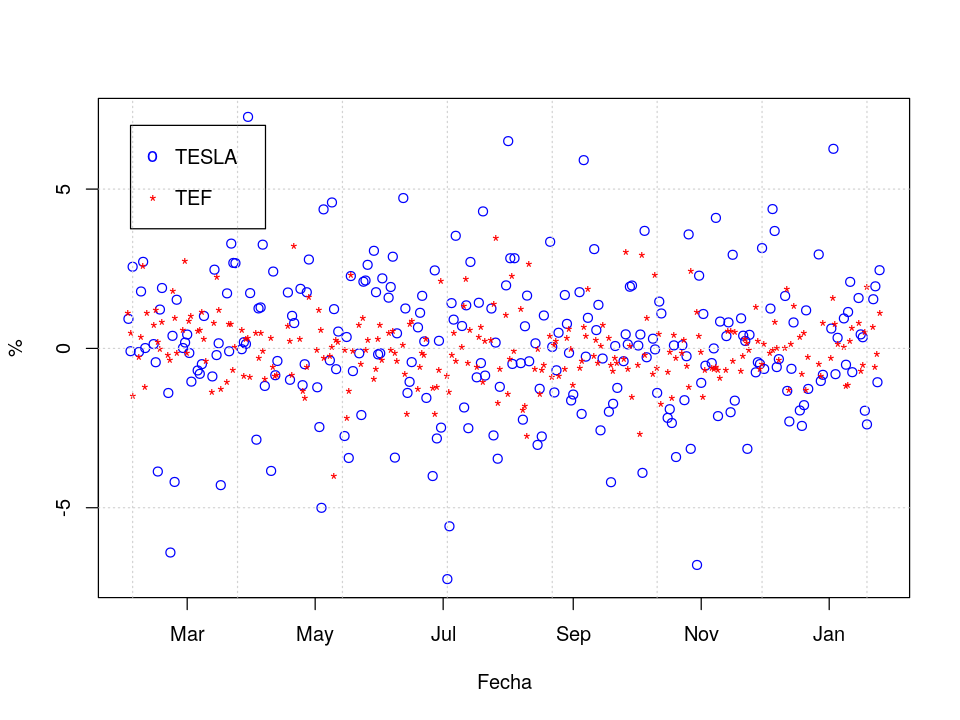

In [23]:
options(repr.plot.height=6,repr.plot.width=8)

plot(myStocks$date, myStocks$TSLA, xlab= "Fecha", ylab="%", col="blue", cex=1)
points(myStocks$date, myStocks$TEF, xlab= "Fecha", ylab="%", col="red", pch="*")
legend(myStocks$date[2],7,c("TESLA","TEF"), pch=c("o","*"),col=c("blue","red"), y.intersp = 2)
grid()
# http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r


Posibles valores para pch:
![](http://www.sthda.com/sthda/RDoc/figure/graphs/r-plot-pch-symbols-points-in-r.png)

En la gráfica podemos ver como las acciones de Tesla varían mucho más que las acciones de las de telefónica. Mientras que las acciones de Tesla tienen jornadas donde las subidas o bajadas exceden el 5%, en Telefónica raro es el día que varían más del 3%.

La varianza es el estimador estadístico que mejor refleja estos cambios:

In [18]:
paste("Varianza de TESLA:",var(myStocks$TSLA))
paste("Varianza de TELEFONICA:",var(myStocks$TEF))
paste("Desviación típica de TESLA:",sd(myStocks$TSLA))
paste("Desviación típica de TELEFONICA:",sd(myStocks$TEF))

[1] "Varianza de TESLA: 5.06755256345548"

[1] "Varianza de TELEFONICA: 1.14676927374341"

[1] "Desviación típica de TESLA: 2.25112251187168"

[1] "Desviación típica de TELEFONICA: 1.07087313615732"

#### Desigualdad de Chebyshev (Нера́венство Чебышёва)

La desigualdad de Chebyshev es un resultado que ofrece una cota superior a la probabilidad de que el valor de una variable aleatoria con varianza finita esté a una cierta distancia de su esperanza matemática.

\\[ Pr\left( |X-\bar{x}| \geq k · \sigma \right) \leq \frac{1}{k^2} \\] 

O dicho de otras palabras, la probabilidad de que haya valores **fuera** del intervalo $\left[ \bar{x}-k\sigma, \bar{x}+k\sigma \right]$ es menor o igual a $1/{k^2}$.

La desigualdad de Chebyshev es un límite muy pesimista, se pueden obtener mejores resultados cuando la distribución es conocida.

#### Ejemplo Alturas

Si miramos el vector de alturas anterior, podemos sacar una tabla en función de k.

Por ejemplo podemos decir que como máximo el 44% ( $\frac{1}{1.5^2}=0.4444$ ) de las muestras se encuentran fuera del intervalo $\left[ \bar{x}-k\sigma, \bar{x}+k\sigma \right]= [1.69-1.5·0.135,1.69+1.5·0.135]=[1.487639	,1.892361]$

In [24]:
k <- c(1.01,seq(from=1.5, to=5, by=0.5))

margen <- data.frame(limite_inf=mean(alturas)-k*sd(alturas),
                     limite_sup=mean(alturas)+k*sd(alturas),
                     prob = 1/k^2,
                     k
                    )
margen


limite_inf,limite_sup,prob,k
<dbl>,<dbl>,<dbl>,<dbl>
1.553744,1.826256,0.98029605,1.01
1.487639,1.892361,0.44444444,1.50
1.420185,1.959815,0.25000000,2.00
1.352732,2.027268,0.16000000,2.50
1.285278,2.094722,0.11111111,3.00
1.217824,2.162176,0.08163265,3.50
1.150370,2.229630,0.06250000,4.00
1.082917,2.297083,0.04938272,4.50
1.015463,2.364537,0.04000000,5.00


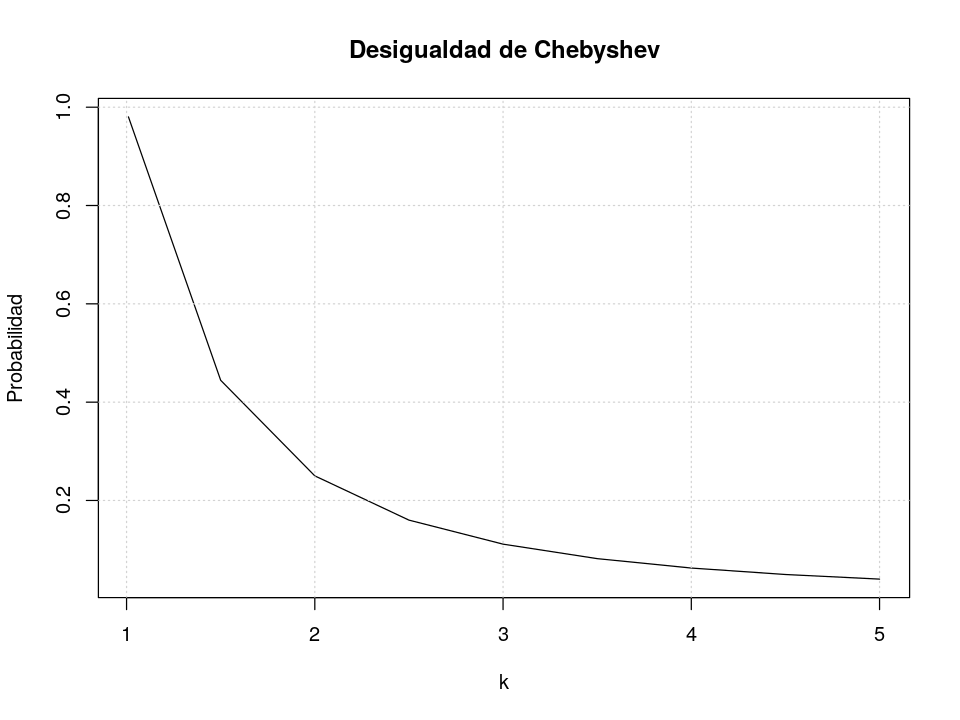

In [25]:
plot(margen$k,margen$prob,t='l',xlab="k",ylab="Probabilidad",main="Desigualdad de Chebyshev")
grid()

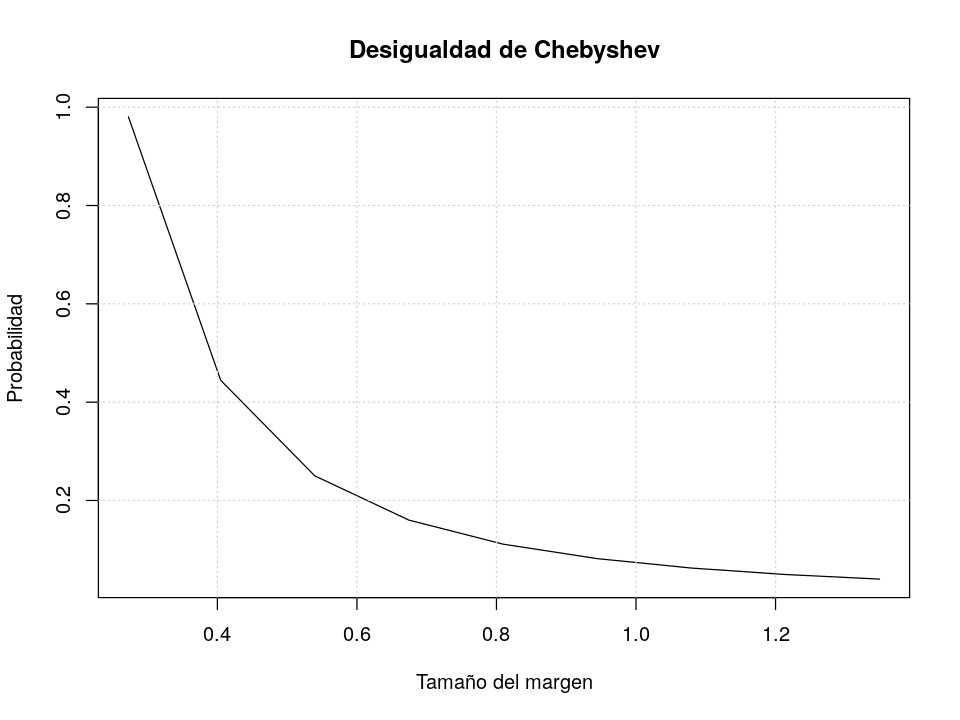

In [26]:
plot(margen$limite_sup-margen$limite_inf,margen$prob,t='l',
     xlab="Tamaño del margen",
     ylab="Probabilidad",main="Desigualdad de Chebyshev")
grid()

#### Ejemplo varianza acciones

Podemos repetir el ejercicio anterior con las acciones. Al menos el 50% de las acciones de Telefónica se encuentran en el rango [-1.5,1.53], mientras que en cambio las acciones de Tesla, al tener una mayor varianza su rango crece a [-3,3.35].

In [27]:
k<-c(sqrt(1/0.75),sqrt(1/0.5),sqrt(1/0.25))
margen<-data.frame(TEF_inf=mean(myStocks$TEF)-k*sd(myStocks$TEF),
                   TEF_sup=mean(myStocks$TEF)+k*sd(myStocks$TEF),prob=1/k^2,
                   TESLA_inf=mean(myStocks$TSLA)-k*sd(myStocks$TSLA),
                   TESLA_sup=mean(myStocks$TSLA)+k*sd(myStocks$TSLA)
                  )

margen

TEF_inf,TEF_sup,prob,TESLA_inf,TESLA_sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.221692,1.251384,0.75,-2.433883,2.764862
-1.499598,1.529289,0.50,-3.018079,3.349057
-2.126901,2.156592,0.25,-4.336756,4.667734


### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [29]:
sort(alturas)

[1] 1.50 1.60 1.63 1.65 1.75 1.80 1.90

In [40]:
(length(alturas)+1)/2

[1] 4

In [34]:
i <- 4
i == round(i)

[1] TRUE

In [38]:
myMedian<-function(x){
    x<-sort(x)
    i <- (length(x)+1)/2
    if (round(i)==i){ #Comprobamos que i sea un número entero
        return(x[i])
    }else{
        return(
            (
            x[floor(i)] + 
            x[ceiling(i)] )/2 )
    }
}

In [39]:
myMedian(alturas)

[1] 1.65

Como siempre es aconsejable utilizar la función que R ha preparado

In [41]:
median(alturas)

[1] 1.65

Media y mediana no tienen porqué ser iguales. Ejemplo salarios brutos españoles de 2020 [Fuente](http://www.ine.es/prensa/epa_2016_d.pdf):
* **Salario medio:** 25.165,51€/mes
* **Salario mediano:** 20.920,12€/mes

Esto indica que hay poca gente con sueldos muy altos que sube la media, la distribución no es simétrica.

![](pics/salario_medio_españa.png)

In [51]:
valor_medio <- 100000
valor_por_persona <- rep(valor_medio, 100)

am <- 56400e6
valor_por_persona <- c(valor_por_persona,am)
valor_por_persona

mean(valor_por_persona)
median(valor_por_persona)

[1] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
  [9] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [17] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [25] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [33] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [41] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [49] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [57] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [65] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [73] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [81] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [89] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05 1.00e+05
 [97] 1.00e+05 1.00e+05 1.00e+05 1.00e+05 5.64e+10

[1] 558514851

[1] 1e+05

### Cuartiles

Los [cuartiles](https://es.wikipedia.org/wiki/Cuartil) son los tres valores que dividen un conjunto de datos ordenados en cuatro partes porcentualmente iguales.
* Q1: El 25% de las muestras se encuentran por debajo del primer cuartil.
* Q2: El 50% de las muestras se encuentran por debajo del segundo cuartil. Este valor también se le conoce como *mediana*
* Q3: El 75% de las muestras se encuentran por debajo del tercer cuartil.
* Rango intercuantílico (IQR): Q3-Q1

Una forma muy práctica de mostrar estos valores es con el diagrama de cajas (boxplot en inglés).
El boxplot se compone de:
* Caja (Box): El lado superior indica el lugar de Q3, el lado inferior es Q1 y la línea que lo atraviesa es Q2
* Bigotes (Whiskers): Dos líneas que se exitienden 1.5 veces el IQR desde Q3 y desde Q1.
* Valores atípicos (Outlayers): Valores que se encuentran fuera de los bigotes.

In [52]:
summary(alturas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   1.615   1.650   1.690   1.775   1.900 

25% 
-0.643214

75% 
0.5665261

iqr 
1.20974

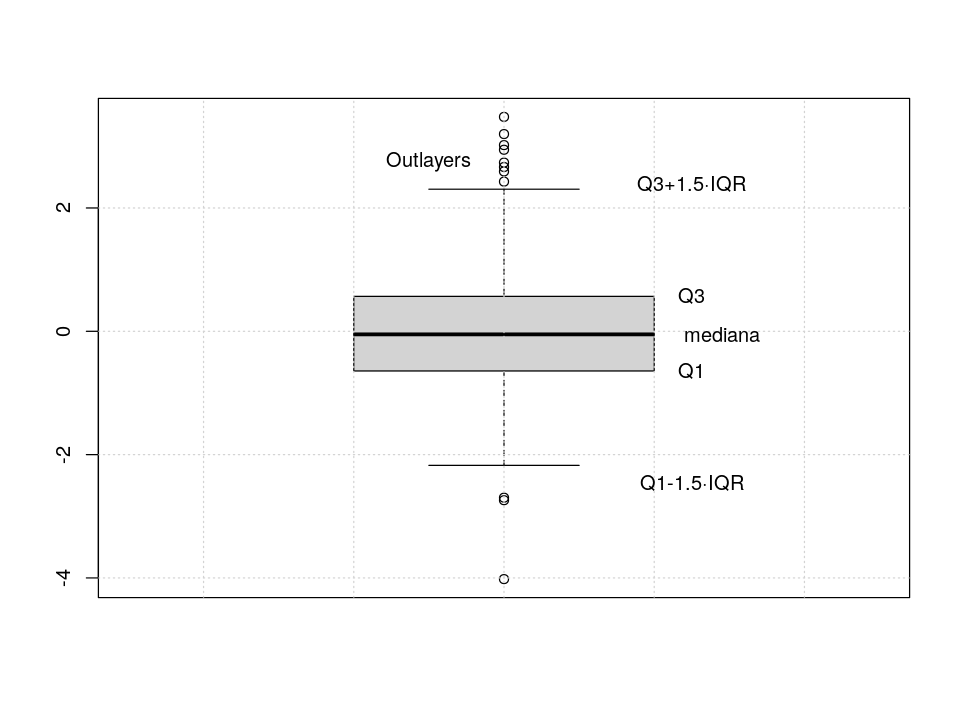

In [53]:
X<-myStocks$TEF
boxplot(X)
grid()
q1<-quantile(X,0.25)
q3<-quantile(X,0.75)
iqr<-q3-q1
names(iqr)<-"iqr"
q1
q3
iqr

text(1.25,q3,"Q3")
text(1.29,median(X),"mediana")
text(1.25,q1,"Q1")
text(1.25,q3+1.5*iqr,"Q3+1.5·IQR")
text(1.25,q1-1.5*iqr,"Q1-1.5·IQR")

text(0.9,q3+1.8*iqr,"Outlayers")

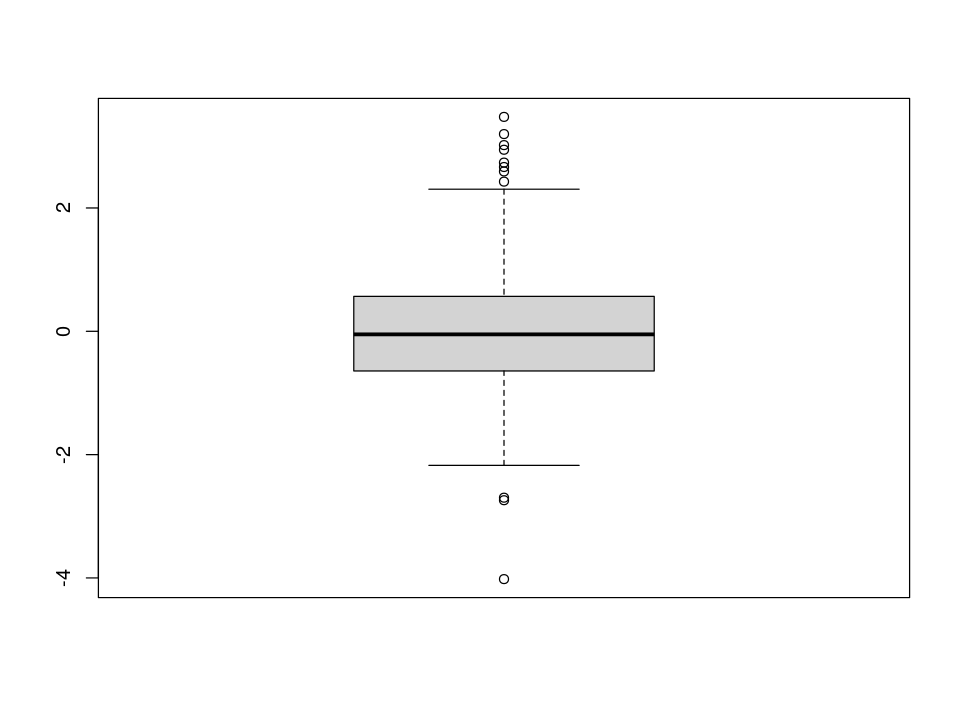

In [54]:
X<-myStocks$TEF
boxplot(X)

In [ ]:
?boxplot

### Quantiles o percentiles

El percentil indica el porcentaje de muestras que se encuentran debajo de un umbral dado. Es igual al cuantil, solo que este está dado en tanto por 1 mientras que el percentil está dado en tanto por ciento.

#### Ejemplo:
Los percentiles se utilizan mucho para mostrar si el peso de un bebé es el correcto o se desvía mucho de lo esperado.
![](pics/percentiles.png)
Fuente [OMS](http://www.who.int/childgrowth/standards/sft_wfa_girls_p/en/)

En R tenemos la función *quantile()*

In [58]:
quantile(alturas,c(0.9,0.5,0.25))

90%   50%   25% 
1.840 1.650 1.615

In [59]:
summary(alturas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   1.615   1.650   1.690   1.775   1.900 

In [61]:
q<-quantile(alturas, c(0.25, 0.5, 0.75))
q

25%   50%   75% 
1.615 1.650 1.775

In [63]:
q['25%']
q[1]

25% 
1.615

25% 
1.615

Ejemplo del uso de percentiles en R:

https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html


### Moda

Es el valor con mayor frecuencia en una distribución.

In [64]:
set.seed(123)
# Creamos una secuencia de 40 números aleatorios
vec<-round(rnorm(40,mean=7,sd=2))
vec

[1]  6  7 10  7  7 10  8  4  6  6  9  8  8  7  6 11  8  3  8  6  5  7  5  6  6
[26]  4  9  7  5 10  8  6  9  9  9  8  8  7  6  6

In [65]:
#Contamos las veces que aparece cada uno
myTable<-table(vec)
myTable

vec
 3  4  5  6  7  8  9 10 11 
 1  2  3 10  7  8  5  3  1 

In [66]:
names(myTable)[which.max(myTable)]

[1] "6"

In [69]:
which.max(myTable)

6 
4

In [67]:
myTable[4]

6 
10

In [70]:
print(paste("La posición del máximo es:",which.max(myTable)))

print(paste("El número más común es:",names(myTable)[which.max(myTable)]))
print(paste("Ese número ha aparecido ",max(myTable),"veces"))


[1] "La posición del máximo es: 4"
[1] "El número más común es: 6"
[1] "Ese número ha aparecido  10 veces"
